
# Vehicles US

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Data analyzing](#hypotheses)
    * [Histogram 1: Best selling models](#activity)
    * [Histogram 2: Car prices by condition](#act1)
    * [Plot 1: Price by mileage and condition](#act2)
    * [Plot 2: Price by year make and condition](#act3)
* [Findings](#end)

## Introduction <a id='intro'></a>


This project is to analyze the data stored in `'vehicles_us.csv'`; to dtermine correlation between price and age, mileage, and condition of  the vehicle; to determine which models are the  most on market; to create python virtual environments, to develope a web application, and deploy it to a cloud service that will make it accessible to the public.

### Stages 
 
My project consists of three stages:
 1. Data overview
 2. Data preprocessing
 3. Analyzing data
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>

Open the data and explore it.

In [ ]:
# importing pandas, numpy and plotly.express libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Load dataset
df = pd.read_csv("/Users/kseniyagormash/Project_6/vehicles_us.csv")

In [ ]:
# obtaining the first 10 rows from the df table
df.head(10)

In [ ]:
# obtaining general information about the data in df
df.info()

### Conclusions <a id='data_review_conclusions'></a> 

Each row in the table stores data on a vehicle that was listed for sale. Most columns describe the vehicle itself. 

It's clear that the data is sufficient to alalyze. However, there are missing values.

To move forward, we need to preprocess the data.

[Back to Contents](#back)

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

In [ ]:
# the list of column names in the df table
df.columns

The table contains 13 columns: `'price'`, `'model_year'`, `'model'`, `'condition'`, `'cylinders'`, `'fuel'`, `'odometer'`, `'transmission'`, `'type'`, `'paint_color'`, `'is_4wd'`, `'date_posted'`, `'days_listed'`. 
They store float64(4), int64(2), object(7) data types.

We don't see any issues with style in the column names, but let's change `'model_year'` to `'year'`.

The number of column values is different. This means the data contains missing values.


In [ ]:
# renaming column
df = df.rename(
  columns = {'model_year':'year'    
  }
)

In [ ]:
# the list of column names in the df table to check if name changed
df.columns

In [ ]:
# calculating missing values 
print(df.isna().sum()) 

We can see missing values in `'year'`, `'cylinders'`, `'odometer'`, `'paint_color'`, `'is_4wd'`. 
Let's replace them with `'unknown'` and 0 for `'is_4wd'`.

In [ ]:
# replacing missing values in 'paint_color' with 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

# to check 
df.head(10)

In [ ]:
# replacing missing values in is_4wd: 1 indicates 4wd, 0 - not 4wd
df['is_4wd'] = df['is_4wd'].fillna(0).astype(float).astype(int)

# to check 
df.head(10)

In [ ]:
# looping over columns 'cylinders','year', and 'odometer' and replacing missing values whith the median
#for the certain vehicle model.  
# there is some missing values in 'odometer' column since none of the odometers are known for some models
columns_to_replace = ['cylinders', 'year', 'odometer'] # list of columns with missing values
for column in columns_to_replace:
    df[column] = df.groupby('model')[column].transform(lambda x: x.fillna(x.median())) 

# dropping missing values (they are only in 'odometer' column)
df = df.dropna()
# change data type to integer
df[columns_to_replace] = df[columns_to_replace].astype(float).astype(int)

# to check 
df.head(10)

In [ ]:
# checking for missing values again
print(df.isna().sum())

In [ ]:
# counting clear duplicates
print(df.duplicated().sum())

There are no duplicates.

In [ ]:
# viewing unique model names to check for implicit duplicates
print(df['model'].sort_values().unique())


We can see the following implicit duplicates:
* `'f150'`, `'f-150'`,
* `'f250'`, `'f-250'`,
* `'f250 super duty'`, `'f-250 super duty'`,
* `'f350'`, `'f-350'`,
* `'f150 supercrew cab xlt'`, `'f-150 supercrew cab xlt'`,
* `'ford f350 sd'`, `'ford f350 super duty'`.

Let's get rid of them.


In [ ]:
# function for replacing implicit duplicates
def replace_wrong_models(wrong_models, correct_model): # passing a list of wrong models and a string with the correct model on the function's input
    for wrong_model in wrong_models: # looping over misspelled names
        df['model'] = df['model'].replace(wrong_models, correct_model) # replacing wrong models

In [ ]:
# removing implicit duplicates
# [wrong model, correct model]
duplicates = [
    ['ford f150', 'ford f-150'],
    ['ford f250', 'ford f-250'],
    [['ford f250 super duty', 'ford f-250 super duty'], 'ford f-250 sd'],
    ['ford f350', 'ford f-350'],
    ['ford f150 supercrew cab xlt', 'ford f-150 supercrew cab xlt'],
    [['ford f350 sd', 'ford f350 super duty'], 'ford f-350 sd']
]

for d in duplicates:
    replace_wrong_models(d[0], d[1])

In [ ]:
# checking for implicit duplicates again
print(df['model'].sort_values().unique())

In [ ]:
# saving new table
#df.to_csv('/Users/kseniyagormash/Project_6/processed_vehicles_us.csv', index=False)


### Conclusions <a id='data_preprocessing_conclusions'></a>
We detected three issues with the data:

- Missing values
- Implicit duplicates

All missing values have been replaced with `'unknown'`, 0 or median. But there is some missing values in 'odometer' column, since none of the odometers are known for some models. And, we still have to see whether the missing values will affect our calculations.

The absence of duplicates will make the results more precise and easier to understand.

[Back to Contents](#back)

## Stage 3. Analyzing data <a id='hypotheses'></a>

### Histogram 1: Most selling models <a id='activity'></a>

In [ ]:
# counting models and sorting the result in descending order
model_counts = df.groupby('model')['model'].count().sort_values(ascending=False)
model_counts

In [ ]:
# Create a histogram to know what models are for sale most.
# Set the axis labels
# Show the plot
fig = px.histogram(x=model_counts.index, y=model_counts.values, title='Most selling models')
fig.update_layout(xaxis_title='Car Model', yaxis_title='Number of listings')
fig.show()

Top 10 models on sale: 
1. ford f-150                    
2. chevrolet silverado 1500      
3. ram 1500                     
4. chevrolet silverado           
5. jeep wrangler                 
6. ram 2500                      
7. ford f-250 sd                 
8. toyota camry                   
9. honda accord 
10. chevrolet silverado 2500hd                                         

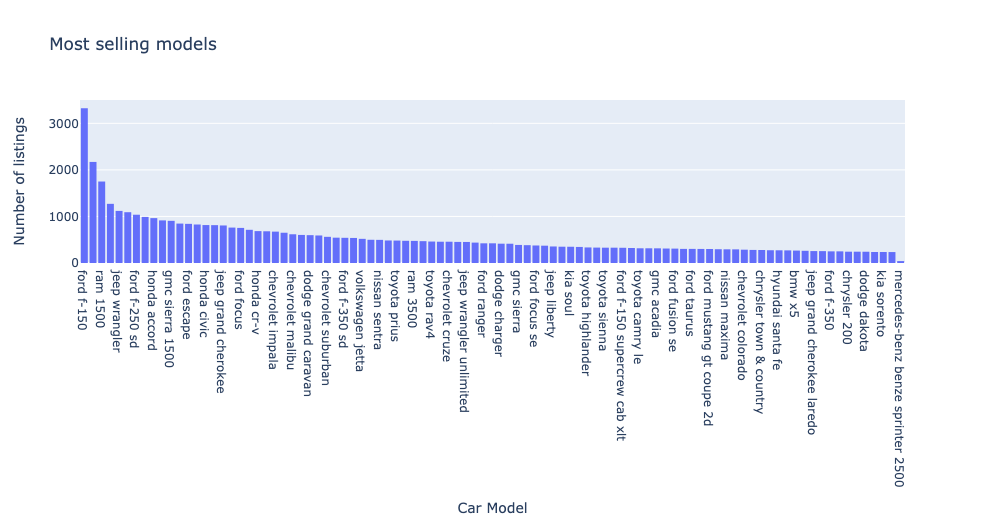

In [1]:
# adding picture of histogram
from IPython import display
display.Image("/Users/kseniyagormash/Project_6/pics/newplot.png")

### Histogram 2: Car prices by condition <a id='act1'></a>

In [ ]:
# creating histogram to know how condition affects price
fig1 = px.histogram(
    df, 
    x='price',
    title='Car prices by condition', 
    color='condition', 
     )

# setting the range of the x-axis to be between 0 and 50000 to make visualization more clear
fig1.update_xaxes(range=[0, 50_000])
# Setind the axis labels
fig1.update_layout(xaxis_title='Price', yaxis_title='Number of listings')
# displaing the histogram
fig1.show()

Conclusions:
* most listings with a price of less than $20000.
* most of cars are sold in good or excellent conditions.
* least of cars are sold in new, fair, and solvage conditions.

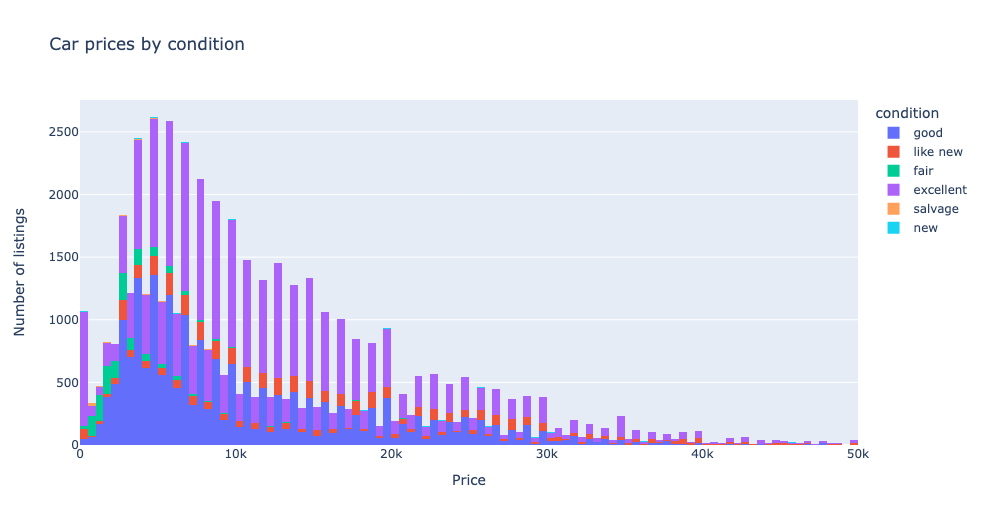

In [2]:
# adding picture of histogram
from IPython import display
display.Image("/Users/kseniyagormash/Project_6/pics/plot.png")

### Plot 1: Price by mileage and condition <a id='act2'></a>

In [ ]:
# creating scatter plot to know how mileage affects price
fig2 = px.scatter(
    df, 
    x='odometer', 
    y='price', 
    title='Price by mileage and contition', 
    color='condition'
    )

# setting the range of the x-axis to be between 0 and 600000 
fig2.update_xaxes(range=[0, 600_000])
fig2.update_yaxes(range=[0, 100_000])
# displaing the plot
fig2.show()

Conclusions: 
* positive correlation between condition and price: better condition - higher price
* negative correlation between mileage and price: higher mileage - lower price

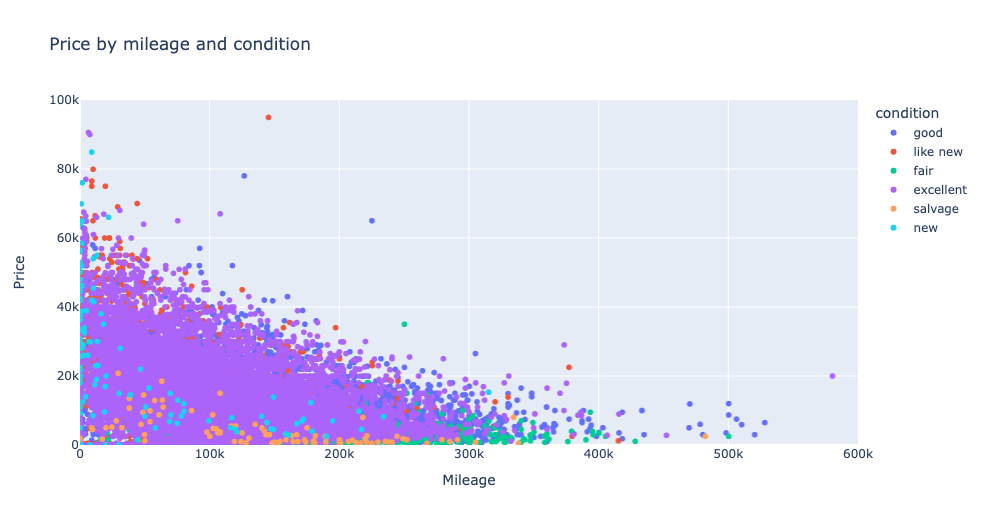

In [3]:
# adding picture of plot
from IPython import display
display.Image("/Users/kseniyagormash/Project_6/pics/newplot1.png")

### Plot 2: Price by make year and condition <a id='act3'></a>

In [ ]:
# creating scatter plot to know how age affects price
fig2 = px.scatter(
    df, 
    x='year', 
    y='price', 
    title='Price by make year and contition', 
    color='condition'
    )
# setting the range of the x-axis and y-axis 
fig2.update_xaxes(range=[1900, 2020])
fig2.update_yaxes(range=[0, 100_000])
# displaing the plot
fig2.show()

Conclusions:
* positive correlation between price and age of vehicle.
* vehicles made between 1960 and 1980 in  exellent condition have high price

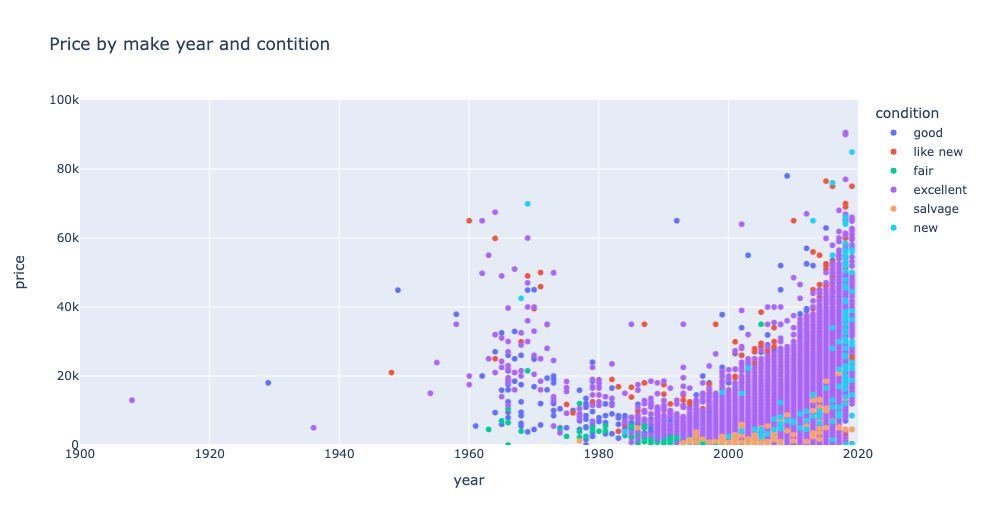

In [4]:
# adding picture of plot
from IPython import display
display.Image("/Users/kseniyagormash/Project_6/pics/newplot2.png")

[Back to Contents](#back)

# Findings <a id='end'></a>

After analyzing the data we concluded:
* price has positive correlation with condition and age of vehicle
* price has negative correlation with mileage
* most listings have price of less than $20000
* most of cars are sold in good or excellent conditions
* least of cars are sold in new, fair, and solvage conditions
* vehicles made between 1960 and 1980 in  exellent condition have high price
* most selling models:
1. ford f-150   
2. chevrolet silverado 1500 
3. ram 1500  
4. chevrolet silverado
5. jeep wrangler  
6. ram 2500 
7. ford f-250 sd  
8. toyota camry 
9. honda accord
10. chevrolet silverado 2500hd 

[Back to Contents](#back)